In [3]:
import tensorflow as tf
from utils import *
from the_model import model_8

# 设置随机种子以保证可重复性
random.seed(888)
np.random.seed(888)
tf.random.set_seed(888)

# 加载类别标签
with codecs.open(LABELS_PATH, "r", "UTF-8") as label_file:
    klasses = [line.strip() for line in label_file.readlines()]

# 加载模型和权重
model = model_8(IMG_SIZE, len(klasses))
model.load_weights(WEIGHTS_PATH)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("开始训练...")
for layer in model.layers[:-4]:  # 除最后四层外，其他层设置为不可训练
    layer.trainable = False

for layer in model.layers[-4:]:  # 最后四层设置为可训练
    layer.trainable = True
    
# 重新编译模型，使用较小的学习率进行微调
model.compile(optimizer=Adam(learning_rate=5e-5),  # 较小的学习率
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# 微调模型

# 读取训练集和验证集
train_dataset = load_tfrecords('train.tfrecords')
test_dataset = load_tfrecords('test.tfrecords')

# 为了提高训练速度，可以对数据集进行缓存、打乱和批处理
train_dataset = train_dataset.shuffle(buffer_size=50000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

# 使用现有的模型进行训练
history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)


2024-08-30 19:18:03.453721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-08-30 19:18:03.497189: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:d9:00.0 name: NVIDIA GeForce RTX 3080 Ti computeCapability: 8.6
coreClock: 1.665GHz coreCount: 80 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 849.46GiB/s
2024-08-30 19:18:03.497229: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-30 19:18:03.500996: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-30 19:18:03.501075: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-08-30 19:18:03.502148: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library li

开始训练...
Epoch 1/5


2024-08-30 19:18:05.652268: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-30 19:18:05.660090: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz
2024-08-30 19:18:07.803094: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-08-30 19:18:08.721070: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2024-08-30 19:18:09.859588: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-30 19:18:10.639817: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


     12/Unknown - 6s 17ms/step - loss: 0.2540 - accuracy: 0.9362

2024-08-30 19:18:10.878564: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


14028/14028 [==============================] - 275s 19ms/step - loss: 0.2104 - accuracy: 0.9479 - val_loss: 0.1733 - val_accuracy: 0.9579
Epoch 2/5
14028/14028 [==============================] - 265s 19ms/step - loss: 0.1621 - accuracy: 0.9616 - val_loss: 0.1603 - val_accuracy: 0.9619
Epoch 3/5
14028/14028 [==============================] - 266s 19ms/step - loss: 0.1497 - accuracy: 0.9652 - val_loss: 0.1542 - val_accuracy: 0.9634
Epoch 4/5
14028/14028 [==============================] - 265s 19ms/step - loss: 0.1412 - accuracy: 0.9675 - val_loss: 0.1498 - val_accuracy: 0.9647
Epoch 5/5
14028/14028 [==============================] - 265s 19ms/step - loss: 0.1354 - accuracy: 0.9691 - val_loss: 0.1457 - val_accuracy: 0.9660


In [7]:
# 定义权重文件的保存路径
weights_path = './new_model.weights.h5'
# 保存模型权重
model.save_weights(weights_path)


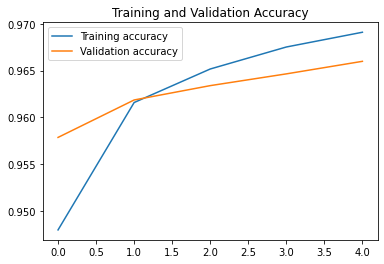

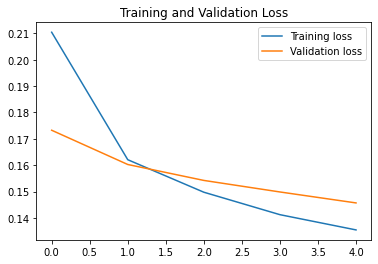

In [8]:
# 绘制训练和验证的准确性
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 绘制训练和验证的损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()